In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pymap3d as pm

In [4]:
bagall = "all"
bagrange = "range"
bagrangeerr = "range_beacon_error"
bagallerr = "all_beacon_error"
bagimu = "imu_range"

In [5]:
def plot_traj(in_bag):
    bag  = in_bag
    lat0 = 40.905000 # deg
    lon0 = 12.959967 # deg
    h0   = 0.0     # meters
    
    init   = pm.geodetic2ned(40.904522, 12.961190, 0, lat0, lon0, h0)
    anch_1 = pm.geodetic2ned(40.90419, 12.96163, 0, lat0, lon0, h0)
    anch_2 = pm.geodetic2ned(40.9041, 12.96131, 0, lat0, lon0, h0)
    anch_3 = pm.geodetic2ned(40.90445, 12.96101, 0, lat0, lon0, h0)
    anch_4 = pm.geodetic2ned(40.90472, 12.96118, 0, lat0, lon0, h0)
    
    #################################################################################
    
    data_state = pd.read_csv("../bagfiles/"+bag+"_state.csv")
    data_gps = pd.read_csv("../bagfiles/"+bag+"_gps.csv")
    data_range = pd.read_csv("../bagfiles/"+bag+"_range.csv")
    
    #################################################################################
    
    x = []
    y = []
    
    state_num = data_state[ ["field.position.latitude", "field.position.longitude", "field.position.altitude"] ].to_numpy()
    for state in state_num:
        n, e, d = pm.geodetic2ned(state[0], state[1], 0, lat0, lon0, h0)
        x.append(e)
        y.append(n)
    x = np.array(x)
    y = np.array(y)
    
    #################################################################################
    
    xt = []
    yt = []
    
    state_num = data_gps[ ["field.latitude", "field.longitude", "field.altitude"] ].to_numpy()
    for gps in state_num:
        n, e, d = pm.geodetic2ned(gps[0], gps[1], 0, lat0, lon0, h0)
        xt.append(e)
        yt.append(n)
    xt = np.array(xt)
    yt = np.array(yt)
    
    #################################################################################
    
    t_gps       = np.array(data_gps["%time"])
    t_ran       = np.array(data_range["%time"])
    t_st        = np.array(data_state["%time"])
    
    idx = []
    for t_i in t_gps:
        idx.append(np.abs(t_st-t_i).argmin())
    idx_ran = []
    for t_i in t_ran:
        idx_ran.append(np.abs(t_st-t_i).argmin())
    idx = np.array(idx)
    idx_ran = np.array(idx_ran)
    
    #################################################################################
    
    plt.cla()
    # Plot figure with subplots of different sizes
    fig = plt.figure(1)
    # set up subplot grid
    gridspec.GridSpec(4,4)
    
    # LARGE SUBPLOT
    plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=4)
    plt.title('GPS vs estimated trajectory')
    plt.xlabel('East [m]')
    plt.ylabel('North [m]')
    
    # Filter Estimate
    plt.plot(x,y, c='darkviolet')
    plt.scatter(x,y, c='darkviolet', marker='x', s=30, linewidth=0.2, label="Filter Estimate")
    
    # Gps
    plt.plot(xt,yt, c="darkorange", linewidth=1.5, label="GPS position")
    
    plt.annotate(text="START", xy=(xt[0], yt[0]), xytext=(xt[0]+20, yt[0]), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    plt.annotate(text="END", xy=(xt[-1], yt[-1]), xytext=(xt[-1]+8, yt[-1]+10), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    
    # Anchors
    plt.scatter([anch_1[1], anch_2[1], anch_3[1], anch_4[1] ],
                [anch_1[0], anch_2[0], anch_3[0], anch_4[0] ], s=100, facecolors='none', marker='s', edgecolors='red', label='anchors')
    plt.text(anch_1[1], anch_1[0], "  1")
    plt.text(anch_2[1], anch_2[0], "  2")
    plt.text(anch_3[1], anch_3[0], "  3")
    plt.text(anch_4[1], anch_4[0], "  4")
    
    # Ranges
    plt.scatter(x[idx_ran], y[idx_ran],facecolors='none', marker='s', s=90, edgecolors='green', label='Range update')
    plt.legend(fontsize='small')
    
    # TOP SMALL PLOT
    t = (t_st - t_st[0])/10**(7)
    plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=2)
    plt.plot(t[idx], x[idx],  c='darkviolet', linewidth=1.5, label="Filter Estimate")
    plt.plot(t[idx], xt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
    plt.legend(fontsize='small')
    plt.title('East trajectory')
    plt.ylabel('East [m]')
    plt.xlabel('Time [s]')
    
    #BOTTOM SMALL PLOT  
    plt.subplot2grid((4,4), (2,2), colspan=2, rowspan=2)
    plt.plot(t[idx], y[idx],  c='darkviolet', linewidth=1.5, label="Filter Estimate")
    plt.plot(t[idx], yt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
    plt.title('North trajectory')
    plt.ylabel('North [m]')
    plt.xlabel('Time [s]')
    plt.legend(fontsize='small')
    
    fig.tight_layout(h_pad=0, w_pad=0)
    fig.set_size_inches(w=11,h=7)
    #fig.savefig("plots/"+bag+"")
        
    plt.show()

In [6]:
def plot_err(in_bag):
    bag  = in_bag
    lat0 = 40.905000 # deg
    lon0 = 12.959967 # deg
    h0   = 0.0     # meters
    
    init   = pm.geodetic2ned(40.904522, 12.961190, 0, lat0, lon0, h0)
    anch_1 = pm.geodetic2ned(40.90419, 12.96163, 0, lat0, lon0, h0)
    anch_2 = pm.geodetic2ned(40.9041, 12.96131, 0, lat0, lon0, h0)
    anch_3 = pm.geodetic2ned(40.90445, 12.96101, 0, lat0, lon0, h0)
    anch_4 = pm.geodetic2ned(40.90472, 12.96118, 0, lat0, lon0, h0)
    
    #################################################################################
    
    data_state = pd.read_csv("../bagfiles/"+bag+"_state.csv")
    data_gps = pd.read_csv("../bagfiles/"+bag+"_gps.csv")
    data_range = pd.read_csv("../bagfiles/"+bag+"_range.csv")
    
    #################################################################################
    
    x = []
    y = []
    
    state_num = data_state[ ["field.position.latitude", "field.position.longitude", "field.position.altitude"] ].to_numpy()
    for state in state_num:
        n, e, d = pm.geodetic2ned(state[0], state[1], 0, lat0, lon0, h0)
        x.append(e)
        y.append(n)
    x = np.array(x)
    y = np.array(y)
    
    #################################################################################
    
    xt = []
    yt = []
    
    state_num = data_gps[ ["field.latitude", "field.longitude", "field.altitude"] ].to_numpy()
    for gps in state_num:
        n, e, d = pm.geodetic2ned(gps[0], gps[1], 0, lat0, lon0, h0)
        xt.append(e)
        yt.append(n)
    xt = np.array(xt)
    yt = np.array(yt)
    
    #################################################################################
    
    t_gps       = np.array(data_gps["%time"])
    t_ran       = np.array(data_range["%time"])
    t_st        = np.array(data_state["%time"])
    
    idx = []
    for t_i in t_gps:
        idx.append(np.abs(t_st-t_i).argmin())
    idx_ran = []
    for t_i in t_ran:
        idx_ran.append(np.abs(t_st-t_i).argmin())
    idx = np.array(idx)
    idx_ran = np.array(idx_ran)
    
    #################################################################################
    
    plt.cla()
    # Plot figure with subplots of different sizes
    fig = plt.figure(1)
    # set up subplot grid
    gridspec.GridSpec(4,4)
    
    # LARGE SUBPLOT
    plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=4)
    plt.title('GPS vs estimated trajectory')
    plt.xlabel('East [m]')
    plt.ylabel('North [m]')
    
    # Filter Estimate
    plt.plot(x,y, c='darkviolet')
    plt.scatter(x,y, c='darkviolet', marker='x', s=30, linewidth=0.2, label="Filter Estimate")
    
    # Gps
    plt.plot(xt,yt, c="darkorange", linewidth=1.5, label="GPS position")
    
    plt.annotate(text="START", xy=(xt[0], yt[0]), xytext=(xt[0]+20, yt[0]), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    plt.annotate(text="END", xy=(xt[-1], yt[-1]), xytext=(xt[-1]+8, yt[-1]+10), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    
    # Anchors
    plt.scatter([anch_1[1], anch_2[1], anch_3[1], anch_4[1] ],
                [anch_1[0], anch_2[0], anch_3[0], anch_4[0] ], s=100, facecolors='none', marker='s', edgecolors='red', label='anchors')
    plt.text(anch_1[1], anch_1[0], "  1")
    plt.text(anch_2[1], anch_2[0], "  2")
    plt.text(anch_3[1], anch_3[0], "  3")
    plt.text(anch_4[1], anch_4[0], "  4")
    
    # Ranges
    plt.scatter(x[idx_ran], y[idx_ran],facecolors='none', marker='s', s=90, edgecolors='green', label='Range update')
    plt.legend(fontsize='small')
    
    # TOP SMALL PLOT
    t = (t_st - t_st[0])/10**(7)
    plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=2)
    plt.plot(t[idx], xt - x[idx],  c='darkviolet', linewidth=1, label="East Error")
    plt.plot(t[idx], yt - y[idx],  c='red', linewidth=1, label="North Error")
    #plt.plot(t[idx], xt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
    plt.legend(fontsize='small')
    plt.title('Error')
    plt.ylabel('Error [m]')
    plt.xlabel('Time [s]')
    
    #BOTTOM SMALL PLOT
    plt.subplot2grid((4,4), (2,2), colspan=2, rowspan=2)

    plt.plot(t[idx], xt, linewidth=1.5, c='orange', alpha=0.7, label='GPS North position')
    plt.plot(t[idx], x[idx],  c='darkviolet', linewidth=1.5, label="Filter North Estimate")
      
    plt.plot(t[idx], yt, linewidth=1.5, c='red', alpha=0.7, label='GPS East position')
    plt.plot(t[idx], y[idx],  c='darkblue', linewidth=1.5, label="Filter East Estimate")
    plt.title('North and East trajectories')
    plt.legend(fontsize='x-small')
    plt.ylabel('Trajectories [m]')
    plt.xlabel('Time [s]')
    
    fig.tight_layout(h_pad=0, w_pad=0)
    fig.set_size_inches(w=11,h=7)
        
    plt.show()

    metrics = {
        "Min-err East [x]"  : np.min(xt - x[idx]),
        "Max-err East [x]"  : np.max(xt - x[idx]),
        "Mean-err East [x]" : np.mean(xt - x[idx]),
        "Min-err North [y]"  : np.min(yt - y[idx]),
        "Max-err North [y]"  : np.max(yt - y[idx]),
        "Mean-err North [y]" : np.mean(yt - y[idx])
    }
    errors = (xt - x[idx], yt - y[idx])

    return metrics, errors

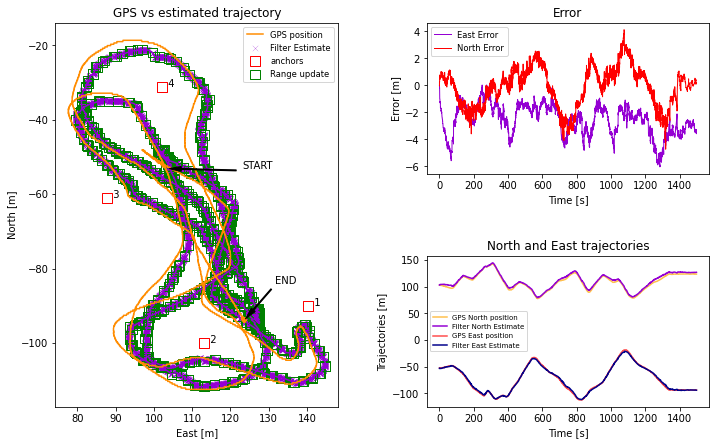

/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1072: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1072: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: invalid value encountered in true_divide
 

In [59]:
error_metrics_range, data_range = plot_err(bagrange)
#error_metrics_bagall = plot_err(bagall)
#error_metrics_bagimu, data_imu = plot_err(bagimu)

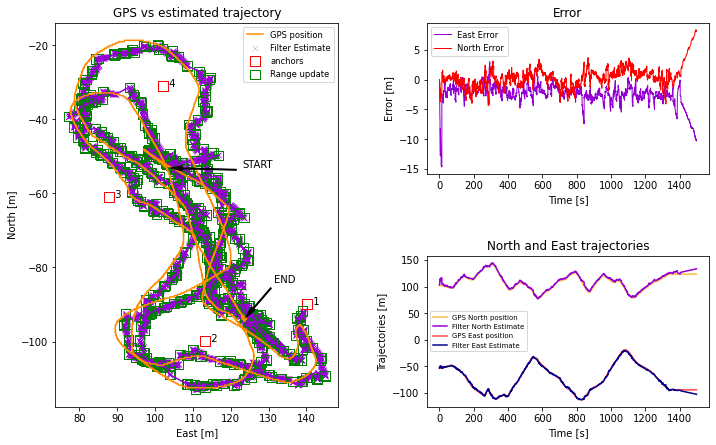

/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1072: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1072: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/korovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: invalid value encountered in true_divide
 

ValueError: too many values to unpack (expected 2)

In [66]:
error_metrics_rangeerr, data_range_err = plot_err(bagrangeerr)
error_metrics_bagallerr, data_all_err = plot_err(bagallerr)

(array([1.000e+01, 2.600e+01, 9.200e+01, 9.100e+01, 1.200e+02, 2.030e+02,
        2.860e+02, 2.210e+02, 3.670e+02, 6.060e+02, 5.390e+02, 6.960e+02,
        7.840e+02, 1.134e+03, 1.387e+03, 1.335e+03, 1.683e+03, 2.203e+03,
        2.090e+03, 2.039e+03, 1.954e+03, 2.019e+03, 1.464e+03, 6.640e+02,
        5.690e+02, 5.740e+02, 6.010e+02, 4.180e+02, 2.270e+02, 2.030e+02,
        1.870e+02, 7.600e+01, 6.400e+01, 5.900e+01, 6.600e+01, 2.000e+00,
        5.300e+01, 1.410e+02, 8.400e+01, 7.900e+01, 3.400e+01, 1.200e+01,
        6.900e+01, 9.400e+01, 9.500e+01, 5.800e+01, 5.300e+01, 0.000e+00,
        6.200e+01, 9.000e+01]),
 array([-4.37659874, -4.12076178, -3.86492482, -3.60908785, -3.35325089,
        -3.09741392, -2.84157696, -2.58574   , -2.32990303, -2.07406607,
        -1.81822911, -1.56239214, -1.30655518, -1.05071822, -0.79488125,
        -0.53904429, -0.28320733, -0.02737036,  0.2284666 ,  0.48430356,
         0.74014053,  0.99597749,  1.25181445,  1.50765142,  1.76348838,
         2.

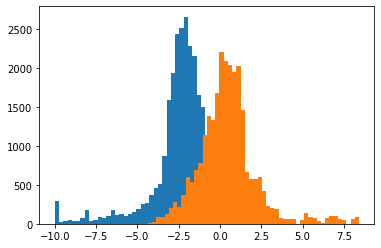

In [54]:
plt.hist(np.clip(data_range_err[0], -10, 10), bins=50)
plt.hist(np.clip(data_range_err[1], -10, 10), bins=50)

(array([2.5889e+04, 4.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.1000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 7.0000e+00]),
 array([-10.        ,  -9.79978112,  -9.59956224,  -9.39934335,
         -9.19912447,  -8.99890559,  -8.79868671,  -8.59846782,
         -8.39824894,  -8.19803006,  -7.99781118,  -7.79759229,
         -7.59737341,  -7.39715453,  -7.19693565,  -6.99671676,
         -6.79649788,  -6.596279  ,  -6.39606012,  -6.19584123

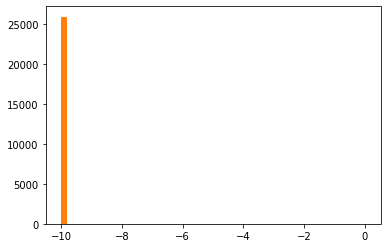

In [41]:
plt.hist(np.clip(data_range[0], -10, 10), bins=50)
plt.hist(np.clip(data_range[1], -10, 10), bins=50)

In [55]:
error_metrics_range, ' ', error_metrics_rangeerr

({'Min-err East [x]': -15.852222110039705,
  'Max-err East [x]': 3.6083725062232332,
  'Mean-err East [x]': -2.162258204654668,
  'Min-err North [y]': -11.483689249912473,
  'Max-err North [y]': 7.121568779823804,
  'Mean-err North [y]': -0.04729496276554924},
 ' ',
 {'Min-err East [x]': -14.649288775733197,
  'Max-err East [x]': 3.0202639430381737,
  'Mean-err East [x]': -2.5155339220916484,
  'Min-err North [y]': -4.376598742305603,
  'Max-err North [y]': 8.415249431217063,
  'Mean-err North [y]': 0.47965933835066715})

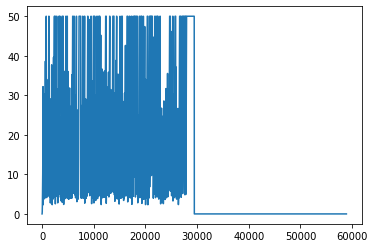

In [42]:
#plt.plot(np.clip(50, 0, pd.read_csv("/home/korovev/.ros/cov_u.csv").to_numpy() ))
plt.plot(np.clip(50, -50, pd.read_csv("/home/korovev/.ros/cov_p.csv").to_numpy() ))